# Test De-Noising Model Implementation (to be deleted)

Since no DL image can be created now (noise need to be further analyzed), we try the denoising model with the real CT images.

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
torch.cuda.get_device_name(0)

'Tesla V100-SXM2-32GB'

## Model

In [3]:
import os
import torch
from utils import load_data

os.chdir("models")
from cnn_trainer import CnnTrainer
from cnn_viewer import CnnViewer

os.chdir("../")

%load_ext autoreload
%autoreload 2

## Data

Create a folder to be deleted to have png images to  test our model. Already created.

Define model parameters

Start Training DnCNN model :
Epoch 1/30...


Progress of training epoch 1: 17it [00:07,  2.16it/s]                        
Progress of validation metrics epoch 1: 5it [00:00, 10.76it/s]                       


Train average metrics: 
	loss (MSE)=1.64e+01, PSNR=3.60e+01,SSIM=8.22e-01
Validation average metrics:
	loss (MSE)=1.61e+01, PSNR=3.61e+01,SSIM=8.36e-01
learning rate=9.99e-03
Epoch 2/30...


Progress of training epoch 2: 17it [00:03,  5.26it/s]                        
Progress of validation metrics epoch 2: 5it [00:00, 11.95it/s]                       


Train average metrics: 
	loss (MSE)=1.61e+01, PSNR=3.61e+01,SSIM=8.35e-01
Validation average metrics:
	loss (MSE)=1.61e+01, PSNR=3.61e+01,SSIM=8.34e-01
learning rate=9.93e-03
Epoch 3/30...


Progress of training epoch 3: 17it [00:03,  5.15it/s]                        
Progress of validation metrics epoch 3: 5it [00:00, 10.94it/s]                       


Train average metrics: 
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.36e-01
Validation average metrics:
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.37e-01
learning rate=9.82e-03
Epoch 4/30...


Progress of training epoch 4: 17it [00:03,  4.90it/s]                        
Progress of validation metrics epoch 4: 5it [00:00,  9.83it/s]                       


Train average metrics: 
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.36e-01
Validation average metrics:
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.37e-01
learning rate=9.66e-03
Epoch 5/30...


Progress of training epoch 5: 17it [00:03,  5.03it/s]                        
Progress of validation metrics epoch 5: 5it [00:00,  9.97it/s]                       


Train average metrics: 
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.36e-01
Validation average metrics:
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.36e-01
learning rate=9.44e-03
Epoch 6/30...


Progress of training epoch 6: 17it [00:03,  5.08it/s]                        
Progress of validation metrics epoch 6: 5it [00:00, 11.20it/s]                       


Train average metrics: 
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.36e-01
Validation average metrics:
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.37e-01
learning rate=9.17e-03
Epoch 7/30...


Progress of training epoch 7: 17it [00:03,  5.24it/s]                        
Progress of validation metrics epoch 7: 5it [00:00, 11.99it/s]                       


Train average metrics: 
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.36e-01
Validation average metrics:
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.37e-01
learning rate=8.86e-03
Epoch 8/30...


Progress of training epoch 8: 17it [00:03,  5.34it/s]                        
Progress of validation metrics epoch 8: 5it [00:00, 12.27it/s]                       


Train average metrics: 
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.36e-01
Validation average metrics:
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.37e-01
learning rate=8.51e-03
Epoch 9/30...


Progress of training epoch 9: 17it [00:03,  5.03it/s]                        
Progress of validation metrics epoch 9: 5it [00:00,  9.13it/s]                       


Train average metrics: 
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.36e-01
Validation average metrics:
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.37e-01
learning rate=8.11e-03
Epoch 10/30...


Progress of training epoch 10: 17it [00:03,  5.03it/s]                        
Progress of validation metrics epoch 10: 5it [00:00, 12.52it/s]                       


Train average metrics: 
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.36e-01
Validation average metrics:
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.37e-01
learning rate=7.68e-03
Epoch 11/30...


Progress of training epoch 11: 17it [00:03,  5.22it/s]                        
Progress of validation metrics epoch 11: 5it [00:00, 12.23it/s]                       


Train average metrics: 
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.36e-01
Validation average metrics:
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.37e-01
learning rate=7.23e-03
Epoch 12/30...


Progress of training epoch 12: 17it [00:03,  5.24it/s]                        
Progress of validation metrics epoch 12: 5it [00:00,  9.87it/s]                       


Train average metrics: 
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.36e-01
Validation average metrics:
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.37e-01
learning rate=6.74e-03
Epoch 13/30...


Progress of training epoch 13: 17it [00:03,  5.21it/s]                        
Progress of validation metrics epoch 13: 5it [00:00, 11.03it/s]                       


Train average metrics: 
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.36e-01
Validation average metrics:
	loss (MSE)=1.59e+01, PSNR=3.61e+01,SSIM=8.37e-01
learning rate=6.24e-03
Epoch 14/30...


Progress of training epoch 14: 17it [00:03,  4.70it/s]                        
Progress of validation metrics epoch 14: 5it [00:00,  9.89it/s]                       


Train average metrics: 
	loss (MSE)=1.60e+01, PSNR=3.61e+01,SSIM=8.37e-01
Validation average metrics:
	loss (MSE)=1.59e+01, PSNR=3.62e+01,SSIM=8.38e-01
learning rate=5.73e-03
Epoch 15/30...


Progress of training epoch 15: 17it [00:03,  4.98it/s]                        
Progress of validation metrics epoch 15: 5it [00:00, 11.85it/s]                       


Train average metrics: 
	loss (MSE)=1.59e+01, PSNR=3.62e+01,SSIM=8.37e-01
Validation average metrics:
	loss (MSE)=1.59e+01, PSNR=3.62e+01,SSIM=8.38e-01
learning rate=5.20e-03
Epoch 16/30...


Progress of training epoch 16: 17it [00:03,  5.11it/s]                        
Progress of validation metrics epoch 16: 5it [00:00, 10.92it/s]                       


Train average metrics: 
	loss (MSE)=1.59e+01, PSNR=3.62e+01,SSIM=8.37e-01
Validation average metrics:
	loss (MSE)=1.59e+01, PSNR=3.62e+01,SSIM=8.37e-01
learning rate=4.68e-03
Epoch 17/30...


Progress of training epoch 17: 17it [00:03,  5.30it/s]                        
Progress of validation metrics epoch 17: 5it [00:00, 11.06it/s]                       


Train average metrics: 
	loss (MSE)=1.58e+01, PSNR=3.62e+01,SSIM=8.39e-01
Validation average metrics:
	loss (MSE)=1.58e+01, PSNR=3.62e+01,SSIM=8.36e-01
learning rate=4.15e-03
Epoch 18/30...


Progress of training epoch 18: 17it [00:03,  5.16it/s]                        
Progress of validation metrics epoch 18: 5it [00:00, 12.26it/s]                       


Train average metrics: 
	loss (MSE)=1.55e+01, PSNR=3.63e+01,SSIM=8.40e-01
Validation average metrics:
	loss (MSE)=1.52e+01, PSNR=3.63e+01,SSIM=8.37e-01
learning rate=3.64e-03
Epoch 19/30...


Progress of training epoch 19: 17it [00:03,  5.29it/s]                        
Progress of validation metrics epoch 19: 5it [00:00, 10.62it/s]                       


Train average metrics: 
	loss (MSE)=1.49e+01, PSNR=3.65e+01,SSIM=8.42e-01
Validation average metrics:
	loss (MSE)=1.48e+01, PSNR=3.65e+01,SSIM=8.41e-01
learning rate=3.14e-03
Epoch 20/30...


Progress of training epoch 20: 17it [00:03,  5.14it/s]                        
Progress of validation metrics epoch 20: 5it [00:00, 12.35it/s]                       


Train average metrics: 
	loss (MSE)=1.47e+01, PSNR=3.65e+01,SSIM=8.43e-01
Validation average metrics:
	loss (MSE)=1.47e+01, PSNR=3.65e+01,SSIM=8.42e-01
learning rate=2.66e-03
Epoch 21/30...


Progress of training epoch 21: 17it [00:03,  5.18it/s]                        
Progress of validation metrics epoch 21: 5it [00:00,  7.64it/s]                       


Train average metrics: 
	loss (MSE)=1.47e+01, PSNR=3.65e+01,SSIM=8.43e-01
Validation average metrics:
	loss (MSE)=1.46e+01, PSNR=3.65e+01,SSIM=8.43e-01
learning rate=2.21e-03
Epoch 22/30...


Progress of training epoch 22: 17it [00:03,  4.91it/s]                        
Progress of validation metrics epoch 22: 5it [00:00, 11.93it/s]                       


Train average metrics: 
	loss (MSE)=1.45e+01, PSNR=3.66e+01,SSIM=8.45e-01
Validation average metrics:
	loss (MSE)=1.43e+01, PSNR=3.66e+01,SSIM=8.46e-01
learning rate=1.79e-03
Epoch 23/30...


Progress of training epoch 23: 17it [00:03,  5.09it/s]                        
Progress of validation metrics epoch 23: 5it [00:00, 10.25it/s]                       


Train average metrics: 
	loss (MSE)=1.41e+01, PSNR=3.67e+01,SSIM=8.48e-01
Validation average metrics:
	loss (MSE)=1.40e+01, PSNR=3.67e+01,SSIM=8.49e-01
learning rate=1.41e-03
Epoch 24/30...


Progress of training epoch 24: 17it [00:03,  5.18it/s]                        
Progress of validation metrics epoch 24: 5it [00:00, 12.28it/s]                       


Train average metrics: 
	loss (MSE)=1.38e+01, PSNR=3.68e+01,SSIM=8.50e-01
Validation average metrics:
	loss (MSE)=1.37e+01, PSNR=3.68e+01,SSIM=8.51e-01
learning rate=1.06e-03
Epoch 25/30...


Progress of training epoch 25: 17it [00:03,  5.40it/s]                        
Progress of validation metrics epoch 25: 5it [00:00, 10.81it/s]                       


Train average metrics: 
	loss (MSE)=1.36e+01, PSNR=3.68e+01,SSIM=8.53e-01
Validation average metrics:
	loss (MSE)=1.35e+01, PSNR=3.69e+01,SSIM=8.53e-01
learning rate=7.60e-04
Epoch 26/30...


Progress of training epoch 26: 17it [00:03,  5.35it/s]                        
Progress of validation metrics epoch 26: 5it [00:00, 12.46it/s]                       


Train average metrics: 
	loss (MSE)=1.35e+01, PSNR=3.69e+01,SSIM=8.54e-01
Validation average metrics:
	loss (MSE)=1.35e+01, PSNR=3.69e+01,SSIM=8.55e-01
learning rate=5.05e-04
Epoch 27/30...


Progress of training epoch 27: 17it [00:03,  5.33it/s]                        
Progress of validation metrics epoch 27: 5it [00:00, 12.17it/s]                       


Train average metrics: 
	loss (MSE)=1.34e+01, PSNR=3.69e+01,SSIM=8.55e-01
Validation average metrics:
	loss (MSE)=1.34e+01, PSNR=3.69e+01,SSIM=8.55e-01
learning rate=3.00e-04
Epoch 28/30...


Progress of training epoch 28: 17it [00:03,  5.09it/s]                        
Progress of validation metrics epoch 28: 5it [00:00, 11.91it/s]                       


Train average metrics: 
	loss (MSE)=1.34e+01, PSNR=3.69e+01,SSIM=8.55e-01
Validation average metrics:
	loss (MSE)=1.34e+01, PSNR=3.69e+01,SSIM=8.55e-01
learning rate=1.48e-04
Epoch 29/30...


Progress of training epoch 29: 17it [00:03,  5.29it/s]                        
Progress of validation metrics epoch 29: 5it [00:00, 12.33it/s]                       


Train average metrics: 
	loss (MSE)=1.34e+01, PSNR=3.69e+01,SSIM=8.55e-01
Validation average metrics:
	loss (MSE)=1.34e+01, PSNR=3.69e+01,SSIM=8.55e-01
learning rate=4.87e-05
Epoch 30/30...


Progress of training epoch 30: 17it [00:03,  5.45it/s]                        
Progress of validation metrics epoch 30: 5it [00:00, 12.23it/s]                       


Train average metrics: 
	loss (MSE)=1.34e+01, PSNR=3.69e+01,SSIM=8.55e-01
Validation average metrics:
	loss (MSE)=1.34e+01, PSNR=3.69e+01,SSIM=8.55e-01
learning rate=4.70e-06
Finish Training DnCNN model !


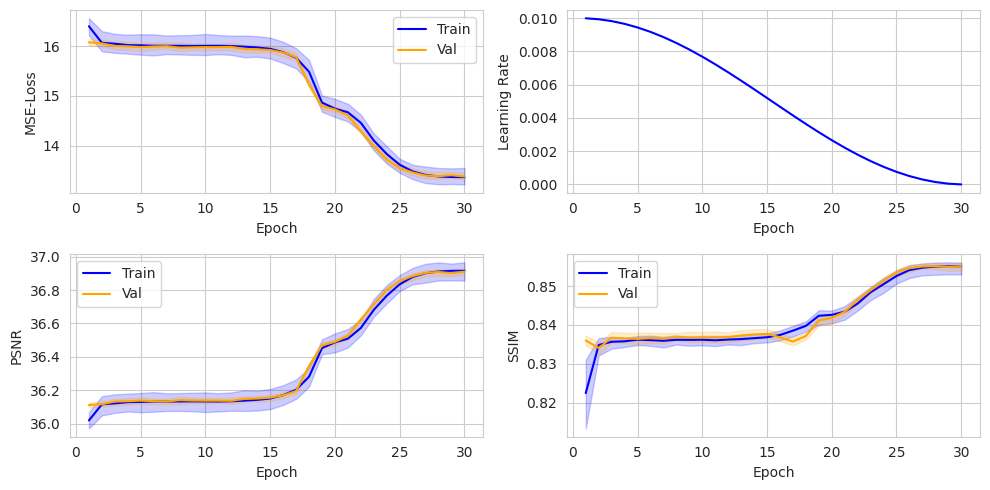

In [4]:
def gaussian(image: torch.tensor, var=10) -> torch.tensor:
    # Get image size
    height, width = image.shape[-2], image.shape[-1]
    # Compute the standard deviation
    std = torch.sqrt(torch.tensor(var))
    # Compute the noise and add to the initial image
    noise = torch.randn(height, width) * std
    noisy_image = image + noise

    return torch.clamp(noisy_image, 0, 255)  # clamp it to be sure all pixel values are into [0, 255]



data_kwargs = dict(
    batch_size=10,
    images_folder_path='to_delete/train',
    add_noise=lambda x: gaussian(x, var=20)
)

optimizer_kwargs = dict(
    lr=1e-2,
    weight_decay=1e-3
)

cnn = CnnTrainer(
    model_name='DnCNN',
    data_kwargs=data_kwargs,
    num_epochs=30,
    device='cuda',
    optimizer_kwargs=optimizer_kwargs,
    model_saving_path=None,
    val_size=0.2
)

cnn.fit(plot=True)

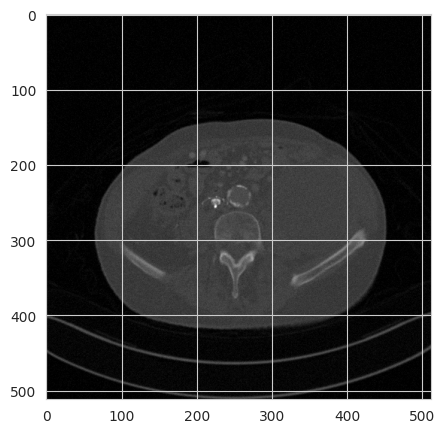

In [5]:
import matplotlib.pyplot as plt

loader = cnn.training_loader
# Alternatively, use iter() and next() to get the next batch
data_iter = iter(loader)
batch = next(data_iter)

data, target = batch[1][0], batch[0][0]

plt.figure(figsize=(5,5))
plt.imshow((target).cpu().numpy().squeeze(), cmap='grey')
plt.show()